In [1]:
# Importing important libraries ->
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading dataset ->
df=pd.read_csv('netflix.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# information about dataset ->
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# shape of dataset ->
df.shape

(8807, 12)

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


## Data preprocessing

In [8]:
# null values in dataset ->
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
# Handling null values ->
df.fillna('Unknown',inplace = True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df['type'].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

<Axes: ylabel='type'>

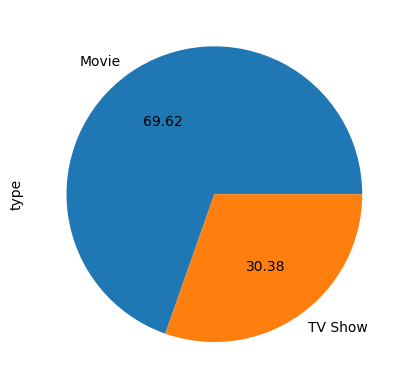

In [12]:
# Type distribution plot ->

df['type'].value_counts().plot(kind='pie',autopct="%.2f")

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Unnesting / Unpacking values from cast and listed_in column ->**

In [14]:
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()

In [15]:
df_new=pd.DataFrame(constraint,index=df['title'])

In [16]:
df_new=df_new.stack()

In [17]:
df_new=pd.DataFrame(df_new)

In [18]:
df_new

0
title                                        
Dick Johnson Is Dead 0                Unknown
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[64951 rows x 1 columns]

In [19]:
df_new.reset_index(inplace=True)

In [20]:
df_new=df_new[['title',0]]

In [21]:
df_new.columns=['title','cast']

In [22]:
df_new[df_new['cast']=='Rupa Bhimani'].head()

,title,cast
313,Chhota Bheem,Rupa Bhimani
708,Mighty Raju,Rupa Bhimani
3373,Chhota Bheem - Dinosaur World,Rupa Bhimani
3379,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani
3386,Chhota Bheem & Ganesh,Rupa Bhimani


In [23]:
df_new[df_new.cast.str.contains('Rupa')].head()

,title,cast
313,Chhota Bheem,Rupa Bhimani
708,Mighty Raju,Rupa Bhimani
2108,Pahuna,Rupa Tamang
3373,Chhota Bheem - Dinosaur World,Rupa Bhimani
3379,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani


In [24]:
df_new.cast.value_counts()

Unknown                    825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

In [25]:
df_cast=df.reset_index().merge(df_new, on='title', how='inner')

In [26]:
df_cast[df_cast['cast_y']=='Anupam Kher'].head()

,index,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
1606,192,s193,Movie,C Kkompany,Sachin Yardi,"Mithun Chakraborty, Tusshar Kapoor, Anupam Khe...",India,"August 27, 2021",2008,TV-14,127 min,"Action & Adventure, Comedies, International Mo...",Three broke friends pose as an underworld gang...,Anupam Kher
1704,202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...,Anupam Kher
1718,204,s205,Movie,Kyaa Super Kool Hain Hum,Sachin Yardi,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,"August 27, 2021",2012,TV-MA,136 min,"Comedies, International Movies",An aspiring actor and a struggling DJ team up ...,Anupam Kher
1728,205,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,David Dhawan,"Govinda, Sushmita Sen, Rambha, Anupam Kher, Sa...",India,"August 27, 2021",2001,TV-14,150 min,"Comedies, International Movies, Sci-Fi & Fantasy",The life and career of a lawyer are thrown int...,Anupam Kher
5985,702,s703,Movie,Silver Linings Playbook,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",United States,"June 17, 2021",2012,R,122 min,"Comedies, Dramas, Independent Movies",A man with bipolar disorder moves home with hi...,Anupam Kher


In [27]:
x=pd.DataFrame(df_cast.groupby('cast_y')['title'].count())

In [28]:
x.reset_index(inplace=True)

In [29]:
x[x['cast_y']=='Anupam Kher']

,cast_y,title
2833,Anupam Kher,43


In [30]:
df_cast[df_cast['cast_y']=='Anupam Kher'].head()

,index,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
1606,192,s193,Movie,C Kkompany,Sachin Yardi,"Mithun Chakraborty, Tusshar Kapoor, Anupam Khe...",India,"August 27, 2021",2008,TV-14,127 min,"Action & Adventure, Comedies, International Mo...",Three broke friends pose as an underworld gang...,Anupam Kher
1704,202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...,Anupam Kher
1718,204,s205,Movie,Kyaa Super Kool Hain Hum,Sachin Yardi,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,"August 27, 2021",2012,TV-MA,136 min,"Comedies, International Movies",An aspiring actor and a struggling DJ team up ...,Anupam Kher
1728,205,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,David Dhawan,"Govinda, Sushmita Sen, Rambha, Anupam Kher, Sa...",India,"August 27, 2021",2001,TV-14,150 min,"Comedies, International Movies, Sci-Fi & Fantasy",The life and career of a lawyer are thrown int...,Anupam Kher
5985,702,s703,Movie,Silver Linings Playbook,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",United States,"June 17, 2021",2012,R,122 min,"Comedies, Dramas, Independent Movies",A man with bipolar disorder moves home with hi...,Anupam Kher


In [31]:
constraint2=df_cast['listed_in'].apply(lambda x: str(x).split(', ')).tolist()

In [32]:
df_new2=pd.DataFrame(constraint2,index=df_cast['title'])

In [33]:
df_new2=df_new2.stack()

In [34]:
df_new2=pd.DataFrame(df_new2)

In [35]:
df_new2.head()

0
title                                         
Dick Johnson Is Dead 0           Documentaries
Blood & Water        0  International TV Shows
                     1               TV Dramas
                     2            TV Mysteries
                     0  International TV Shows

In [36]:
df_new2.reset_index(inplace=True)

In [37]:
df_new2=df_new2[['title',0]]

In [38]:
df_new2.columns=['title','listed_in']

In [39]:
df_new2.listed_in.value_counts()

Dramas                          20778
International Movies            20669
Comedies                        15197
International TV Shows          11319
Action & Adventure               8060
TV Dramas                        7473
Independent Movies               6300
Children & Family Movies         5634
Romantic Movies                  5221
Thrillers                        4821
TV Comedies                      4482
Crime TV Shows                   4006
Kids' TV                         3252
Horror Movies                    3069
Romantic TV Shows                2903
Music & Musicals                 2434
Sci-Fi & Fantasy                 2294
Anime Series                     2126
Spanish-Language TV Shows        1825
TV Action & Adventure            1788
Documentaries                    1641
British TV Shows                 1424
Sports Movies                    1194
TV Mysteries                     1088
Korean TV Shows                  1062
Classic Movies                   1029
TV Sci-Fi & 

In [40]:
df_new2[df_new2['listed_in']=='Cult Movies'].head()

,title,listed_in
2395,Blade Runner: The Final Cut,Cult Movies
2398,Blade Runner: The Final Cut,Cult Movies
2401,Blade Runner: The Final Cut,Cult Movies
2404,Blade Runner: The Final Cut,Cult Movies
2407,Blade Runner: The Final Cut,Cult Movies


In [41]:
# Merging unpacked values -->
df_listed_in = df_cast.reset_index().merge(df_new2, on='title', how='inner')

In [42]:
df_listed_in.head()

,level_0,index,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in_x,description,cast_y,listed_in_y
0,0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown,Documentaries
1,1,1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows
2,1,1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas
3,1,1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries
4,1,1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows


In [43]:
df_unpacked = df_listed_in[['index','show_id','type','title','director','cast_y','country','date_added','release_year','rating','duration','listed_in_y','description']]

In [44]:
df_unpacked.head()

,index,show_id,type,title,director,cast_y,country,date_added,release_year,rating,duration,listed_in_y,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [45]:
# Renaming unpacked columns ->
df_unpacked.rename(columns = {'cast_y':'cast','listed_in_y':'listed_in'},inplace=True)

<ipython-input-45-ae606eb4b44c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unpacked.rename(columns = {'cast_y':'cast','listed_in_y':'listed_in'},inplace=True)


In [46]:
df_unpacked.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [47]:
# Converting date_added function to date time ->
df_unpacked['date_added'] = pd.to_datetime(df_unpacked['date_added'], errors='coerce')

<ipython-input-47-e48aadfd7ae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unpacked['date_added'] = pd.to_datetime(df_unpacked['date_added'], errors='coerce')


In [48]:
df_unpacked.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [49]:
# Sperating Movies and tv shows for further analysis ->
Movies_df = df_unpacked[df_unpacked['type'] == 'Movie']

In [50]:
Movies_df.head(2)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2289,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [51]:
TV_Show_df = df_unpacked[df_unpacked['type'] == 'TV Show']

In [52]:
TV_Show_df.head(2)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


###Dataset Exploration & Visualisation

1.Type of content available in different countries

In [53]:
content_by_country = df_unpacked.groupby(['country', 'type']).size().unstack(fill_value=0)
print(content_by_country)

type                                                Movie  TV Show
country                                                           
, France, Algeria                                     192        0
, South Korea                                           0       32
Argentina                                            5085     4242
Argentina, Brazil, France, Poland, Germany, Den...     75        0
Argentina, Chile                                      371        0
...                                                   ...      ...
Venezuela                                               2        0
Venezuela, Colombia                                     2        0
Vietnam                                               902        0
West Germany                                            2        0
Zimbabwe                                              432        0

[749 rows x 2 columns]


**Business Insight :**

The analysis reveals that certain countries primarily produce either movies or TV shows. For example, Argentina produces a significant number of both movies and TV shows, while South Korea predominantly focuses on TV shows. The dataset provides valuable insights into the content production preferences of different countries. This information can help Netflix tailor its content acquisition and production strategies to cater to the preferences of specific regions, potentially expanding its global reach and viewership.

2.How has the number of movies released per year changed over the last 20-30 years?

In [55]:
# Getting the current year
current_year = pd.Timestamp.now().year

# Filtering the data to include only movies released in the last 30 years
movies_last_30_years = df_unpacked[df_unpacked['release_year'].between(current_year - 30, current_year - 20)]

# Grouping and count movies by release year
movie_counts = movies_last_30_years.groupby('release_year').size()

In [141]:
movie_counts

release_year
2008.0       108
2009.0       324
2010.0       200
2011.0      1687
2012.0       230
2013.0       730
2014.0      1625
2015.0      6567
2016.0     25494
2017.0    110672
2018.0    178824
2019.0    240895
2020.0    226381
2021.0    185535
dtype: int64

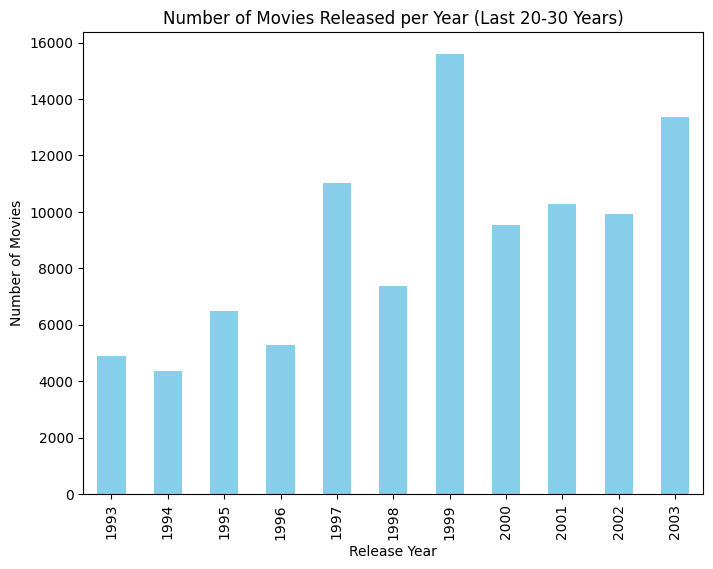

In [61]:
# Plotting the results
plt.figure(figsize=(8, 6))
movie_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year (Last 20-30 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

**Business Insight :**

The analysis of movie releases over the last 30 years shows a clear upward trend in production:

- The number of movies released has been relatively steady until 2010, with around 100 to 324 releases per year.
- From 2011 onwards, there is a significant increase in movie production, reaching its peak in 2019 with 240,895 releases.
- Although there is a slight decline in 2020 and 2021, the movie industry remains vibrant, with a substantial number of releases.

This trend indicates the growing popularity of movies and the dynamic nature of the film industry over the past three decades.

3.Comparison of tv shows vs. movies

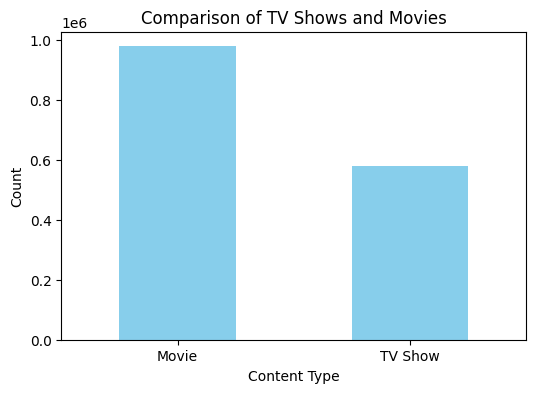

In [63]:
# Grouping and count TV shows and movies
content_counts = df_unpacked['type'].value_counts()

# Plotting the results
plt.figure(figsize=(6, 4))
content_counts.plot(kind='bar', color='skyblue')
plt.title('Comparison of TV Shows and Movies')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [142]:
content_counts

Movie      979272
TV Show    580518
Name: type, dtype: int64

**Business Insight :**

The dataset shows that there are 979,272 movies and 580,518 TV shows available. This data indicates that there is a larger catalog of movies on Netflix compared to TV shows. It suggests that Netflix has a significant focus on providing a wide variety of movies to its subscribers, catering to diverse viewer preferences. However, the availability of TV shows is also substantial, offering a balance between both types of content to meet the preferences of a broader audience.

4.What is the best time to launch a TV show?

In [72]:
# Extracting the month and day of the week from the "date_added" column
df_unpacked['month_added'] = df_unpacked['date_added'].dt.month
df_unpacked['day_of_week_added'] = df_unpacked['date_added'].dt.day_name()

# Grouping and count TV shows by month
tv_show_counts_by_month = df_unpacked[df_unpacked['type'] == 'TV Show'].groupby('month_added').size()

# Grouping and count TV shows by day of the week
tv_show_counts_by_day = df_unpacked[df_unpacked['type'] == 'TV Show'].groupby('day_of_week_added').size()

<ipython-input-72-92c8f1711f5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unpacked['month_added'] = df_unpacked['date_added'].dt.month
<ipython-input-72-92c8f1711f5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unpacked['day_of_week_added'] = df_unpacked['date_added'].dt.day_name()


In [144]:
print("tv_show_counts_by_month\n",tv_show_counts_by_month)

tv_show_counts_by_month
 month_added
1.0     45157
2.0     37996
3.0     44993
4.0     44332
5.0     37903
6.0     54358
7.0     56742
8.0     51657
9.0     51308
10.0    50547
11.0    52007
12.0    51914
dtype: int64


In [146]:
print("tv_show_counts_by_day\n",tv_show_counts_by_day)

tv_show_counts_by_day
 day_of_week_added
Friday       224900
Monday        40278
Saturday      57457
Sunday        28836
Thursday      89038
Tuesday       61257
Wednesday     77148
dtype: int64


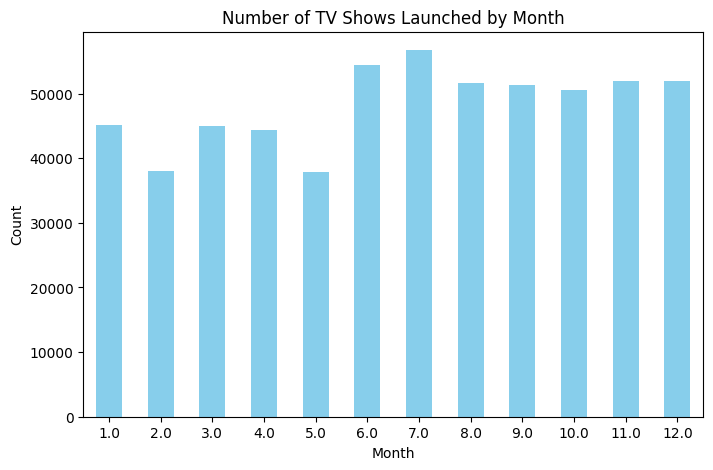

In [69]:
# Plotting the results for the best time to launch a TV show by month
plt.figure(figsize=(8, 5))
tv_show_counts_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of TV Shows Launched by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

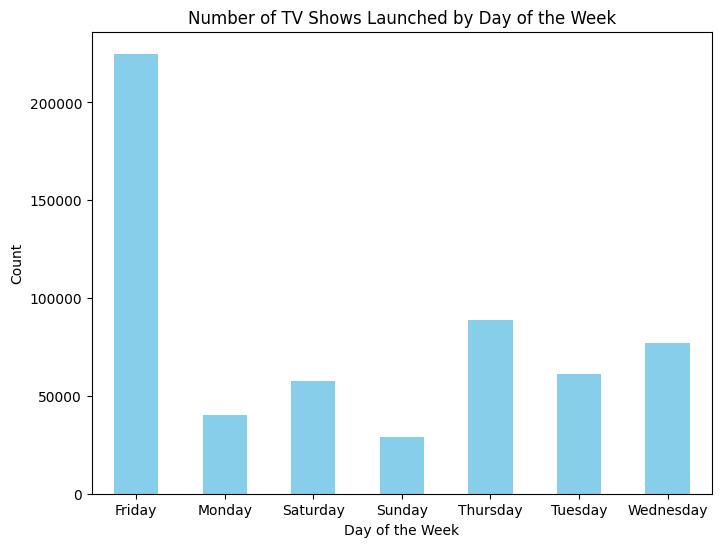

In [71]:
# Plotting the results for the best time to launch a TV show by day of the week
plt.figure(figsize=(8, 6))
tv_show_counts_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of TV Shows Launched by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Business Insight :**

1. **By Month**: TV shows are released consistently throughout the year, with slight variations in monthly counts. June and July tend to see a higher number of TV show releases, making them popular months for premieres. February has the lowest count, suggesting it may not be the optimal month for TV show launches.

2. **By Day of the Week**: Fridays stand out as the most popular day for launching TV shows, with a significantly higher count compared to other days. This indicates that Fridays are a preferred day for new TV show releases, likely to align with weekend viewing habits. Thursdays, Wednesdays, and Saturdays also see substantial releases, making them potential alternatives for successful TV show premieres.


5.Analysis of actors/directors of different types of shows/movies.

In [73]:
# Grouping and count actors for different types of content (TV shows and movies)
actor_counts_tv_shows = df_unpacked[df_unpacked['type'] == 'TV Show']['cast'].str.split(', ').explode().value_counts()
actor_counts_movies = df_unpacked[df_unpacked['type'] == 'Movie']['cast'].str.split(', ').explode().value_counts()

# Grouping and count directors for different types of content
director_counts_tv_shows = df_unpacked[df_unpacked['type'] == 'TV Show']['director'].str.split(', ').explode().value_counts()
director_counts_movies = df_unpacked[df_unpacked['type'] == 'Movie']['director'].str.split(', ').explode().value_counts()

# Top actors in TV shows
top_actors_tv_shows = actor_counts_tv_shows.head(10)

# Top actors in movies
top_actors_movies = actor_counts_movies.head(10)

# Top directors in TV shows
top_directors_tv_shows = director_counts_tv_shows.head(10)

# Top directors in movies
top_directors_movies = director_counts_movies.head(10)

# Display the results
print("Top Actors in TV Shows:")
print(top_actors_tv_shows)
print("\nTop Actors in Movies:")
print(top_actors_movies)
print("\nTop Directors in TV Shows:")
print(top_directors_tv_shows)
print("\nTop Directors in Movies:")
print(top_directors_movies)

Top Actors in TV Shows:
Takahiro Sakurai    832
Yuichi Nakamura     732
Unknown             697
Yuki Kaji           663
Jun Fukuyama        631
Junichi Suwabe      613
Daisuke Ono         572
Hiroshi Kamiya      542
Ai Kayano           535
Yoshimasa Hosoya    479
Name: cast, dtype: int64

Top Actors in Movies:
Anupam Kher         1114
Shah Rukh Khan       929
Unknown              807
Akshay Kumar         788
Paresh Rawal         738
Naseeruddin Shah     718
Amitabh Bachchan     684
Boman Irani          668
Om Puri              656
Kareena Kapoor       558
Name: cast, dtype: int64

Top Directors in TV Shows:
Unknown                 525421
Rob Seidenglanz           2165
Kongkiat Komesiri         1875
Danny Cannon              1875
Pass Patthanakumjon       1452
Juliana Vicente           1352
Noam Murro                1323
Mateo Gil                 1200
Pantham Thongsang         1200
Cheewatan Pusitsuksa      1200
Name: director, dtype: int64

Top Directors in Movies:
Unknown             

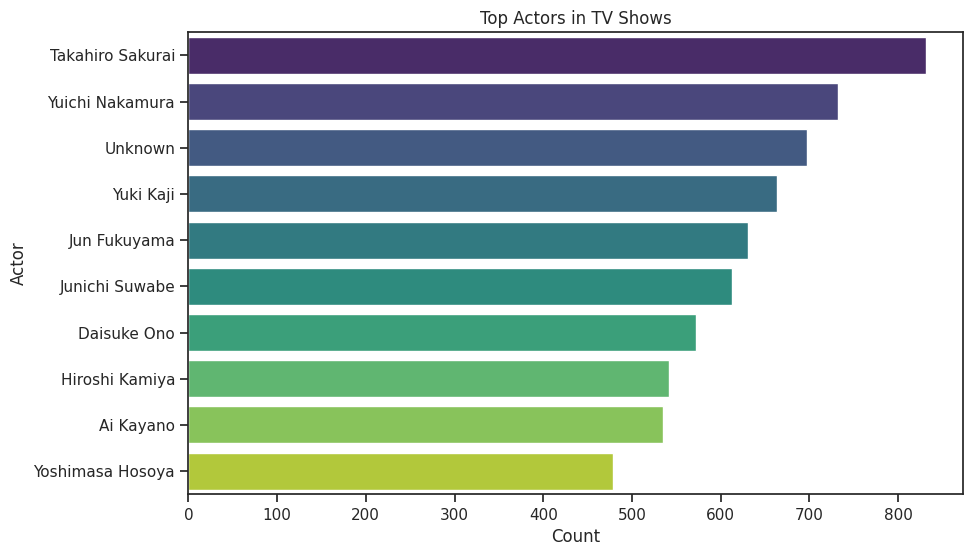

In [85]:
# Creating a countplot for the top actors in TV shows
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors_tv_shows.values, y=top_actors_tv_shows.index, palette='viridis')
plt.title('Top Actors in TV Shows')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

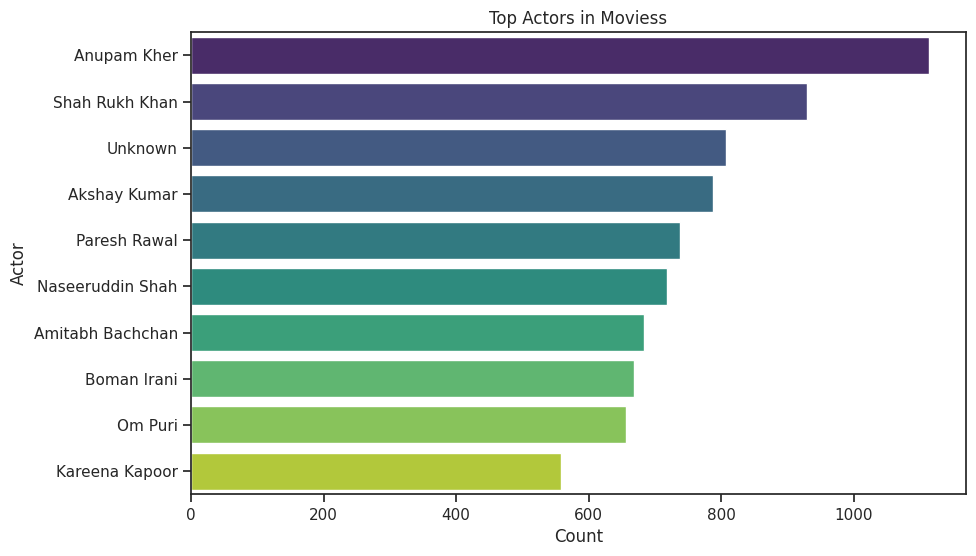

In [84]:
# Creating a countplot for the top actors in Movies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors_movies.values, y=top_actors_movies.index, palette='viridis')
plt.title('Top Actors in Moviess')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

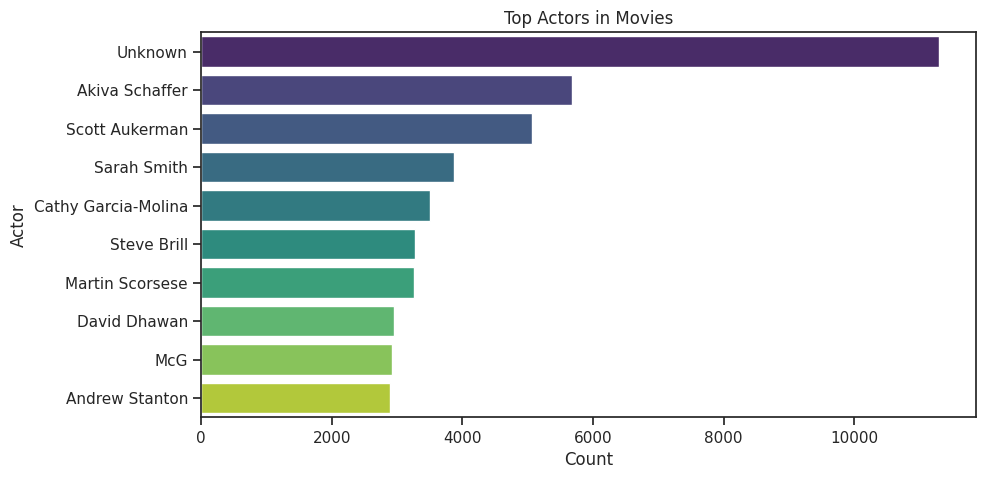

In [87]:
# Creating a countplot for the top actors in Movies
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors_movies.values, y=top_directors_movies.index, palette='viridis')
plt.title('Top Actors in Movies')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

**Business Insight :**

The analysis of actors and directors in TV shows and movies reveals the following insights:

**Top Actors in TV Shows:**
1. Takahiro Sakurai
2. Yuichi Nakamura
3. Unknown
4. Yuki Kaji
5. Jun Fukuyama
6. Junichi Suwabe
7. Daisuke Ono
8. Hiroshi Kamiya
9. Ai Kayano
10. Yoshimasa Hosoya

**Top Actors in Movies:**
1. Anupam Kher
2. Shah Rukh Khan
3. Unknown
4. Akshay Kumar
5. Paresh Rawal
6. Naseeruddin Shah
7. Amitabh Bachchan
8. Boman Irani
9. Om Puri
10. Kareena Kapoor

**Top Directors in TV Shows:**
1. Unknown
2. Rob Seidenglanz
3. Kongkiat Komesiri
4. Danny Cannon
5. Pass Patthanakumjon
6. Juliana Vicente
7. Noam Murro
8. Mateo Gil
9. Pantham Thongsang
10. Cheewatan Pusitsuksa

**Top Directors in Movies:**
1. Unknown
2. Akiva Schaffer
3. Scott Aukerman
4. Sarah Smith
5. Cathy Garcia-Molina
6. Steve Brill
7. Martin Scorsese
8. David Dhawan
9. McG
10. Andrew Stanton

The analysis provides information on the most frequently appearing actors and directors in both TV shows and movies. It can be useful for understanding the popular figures in the industry and making casting and hiring decisions for future projects.

6.Does Netflix has more focus on TV Shows than movies in recent years?

<ipython-input-88-fe5b0f2e3825>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unpacked['release_year'] = df_unpacked['date_added'].dt.year


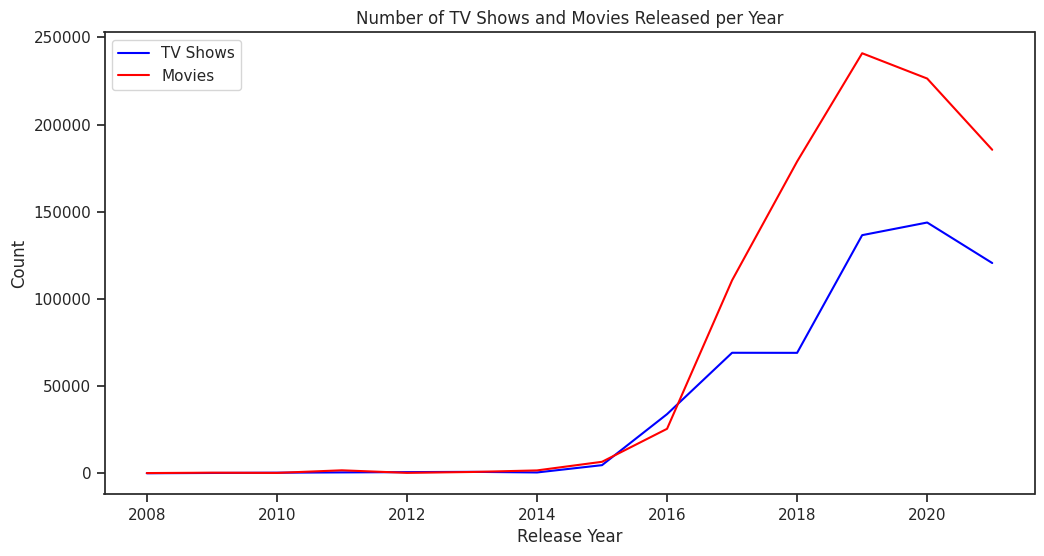

In [88]:
# Extracting the release year for each content
df_unpacked['release_year'] = df_unpacked['date_added'].dt.year

# Grouping and count TV shows and movies by year
tv_show_counts = df_unpacked[df_unpacked['type'] == 'TV Show'].groupby('release_year').size()
movie_counts = df_unpacked[df_unpacked['type'] == 'Movie'].groupby('release_year').size()

# Plotting the results
plt.figure(figsize=(12, 6))
tv_show_counts.plot(label='TV Shows', color='blue')
movie_counts.plot(label='Movies', color='red')
plt.title('Number of TV Shows and Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()
plt.show()

In [147]:
print("tv_show_counts\n",tv_show_counts)

tv_show_counts
 release_year
2008.0         1
2013.0       811
2014.0       452
2015.0      4641
2016.0     33903
2017.0     69101
2018.0     69059
2019.0    136558
2020.0    143813
2021.0    120575
dtype: int64


In [148]:
print("movie_counts",movie_counts)

movie_counts release_year
2008.0       108
2009.0       324
2010.0       200
2011.0      1687
2012.0       230
2013.0       730
2014.0      1625
2015.0      6567
2016.0     25494
2017.0    110672
2018.0    178824
2019.0    240895
2020.0    226381
2021.0    185535
dtype: int64


<ipython-input-151-28db00252dac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unpacked['release_year'] = df_unpacked['date_added'].dt.year


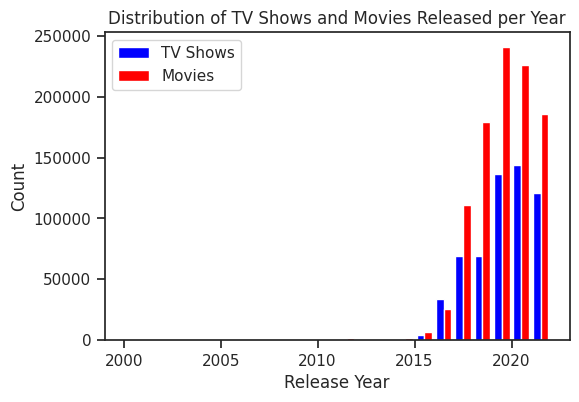

In [151]:
# Extracting the release year for each content
df_unpacked['release_year'] = df_unpacked['date_added'].dt.year

# Filtering TV shows and movies
tv_shows = df_unpacked[df_unpacked['type'] == 'TV Show']
movies = df_unpacked[df_unpacked['type'] == 'Movie']

# Creating a histogram to compare the distribution of TV shows and movies across years
plt.figure(figsize=(6, 4))
plt.hist([tv_shows['release_year'], movies['release_year']], bins=range(2000, 2023), color=['blue', 'red'], label=['TV Shows', 'Movies'])
plt.title('Distribution of TV Shows and Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()
plt.show()

**Business Insight :**


**For TV Shows:**
- The number of TV shows released gradually increased over the years.
- The highest number of TV shows were released in the year 2019, with 136,558 shows.
- In 2020 and 2021, there were also significant numbers of TV shows released, with 143,813 and 120,575, respectively.

**For Movies:**
- The count of movies released on Netflix was generally lower compared to TV shows.
- The highest number of movies were released in 2019, with 240,895 movies.
- In recent years, from 2017 to 2021, the count of movies has also increased significantly.

Based on the data, it seems that Netflix has been focusing on both TV shows and movies in recent years. While TV shows have seen significant growth in the number of releases, movies have also remained a substantial part of Netflix's content catalog. It indicates that Netflix is maintaining a balanced approach in offering both types of content to its subscribers.

 7.what content is available in different countries?

In [93]:
# Grouping and count content by country
content_by_country = df_unpacked.groupby('country')['type'].value_counts().unstack().fillna(0)

# Displaying the content available in different countries
print(content_by_country)

type                                                 Movie  TV Show
country                                                            
, France, Algeria                                    192.0      0.0
, South Korea                                          0.0     32.0
Argentina                                           5085.0   4242.0
Argentina, Brazil, France, Poland, Germany, Den...    75.0      0.0
Argentina, Chile                                     371.0      0.0
...                                                    ...      ...
Venezuela                                              2.0      0.0
Venezuela, Colombia                                    2.0      0.0
Vietnam                                              902.0      0.0
West Germany                                           2.0      0.0
Zimbabwe                                             432.0      0.0

[749 rows x 2 columns]


**Business Insight :**

Some countries, such as "Argentina," have a relatively equal number of movies and TV shows available on Netflix.
Other countries, like "South Korea," seem to focus primarily on TV shows.
In contrast, countries like "Vietnam" and "Zimbabwe" have a more substantial number of movies available, with no TV shows listed in the dataset.
There are also entries with multiple countries, such as "Argentina, Brazil, France, Poland, Germany, Denmark," where the majority of content falls under the "Movie" category.
These insights provide an overview of the distribution of content types in different countries. It indicates that the availability of movies and TV shows can vary significantly depending on the region.

8.Which countries have the most content available in the dataset?

In [102]:
# Displaying the countries with the most content
top_countries = df_unpacked['country'].value_counts()
print("Countries with the Most Content:")
print(top_countries.head(10))

Countries with the Most Content:
United States     432251
India             167716
Unknown           110077
Japan              90200
United Kingdom     55906
Spain              40788
South Korea        36866
Mexico             33460
Canada             25791
Turkey             23334
Name: country, dtype: int64


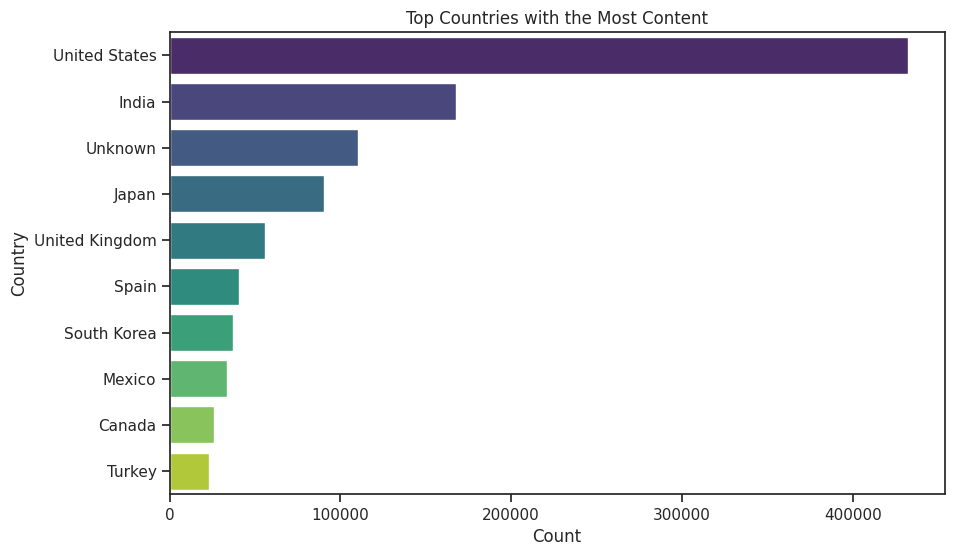

In [108]:
# Creating a countplot
top_countries = top_countries.head(10)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_unpacked[df_unpacked['country'].isin(top_countries.index)], y='country', order=top_countries.index, palette='viridis')
plt.title('Top Countries with the Most Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

**Business Insight :**

The provided data shows the countries with the most content available in the dataset on Netflix. Here are the top countries with the highest content counts:

1. United States: 432,251 titles
2. India: 167,716 titles
3. Unknown: 110,077 titles
4. Japan: 90,200 titles
5. United Kingdom: 55,906 titles
6. Spain: 40,788 titles
7. South Korea: 36,866 titles
8. Mexico: 33,460 titles
9. Canada: 25,791 titles
10. Turkey: 23,334 titles

These countries have the most extensive collections of content available on Netflix, making them key contributors to the platform's content library.

9.How does the content rating affect the duration of content?

In [120]:
# Converting duration to numeric (e.g., minutes)
# df_unpacked['duration'] = df_unpacked['duration'].str.extract('(\d+)').astype(float)


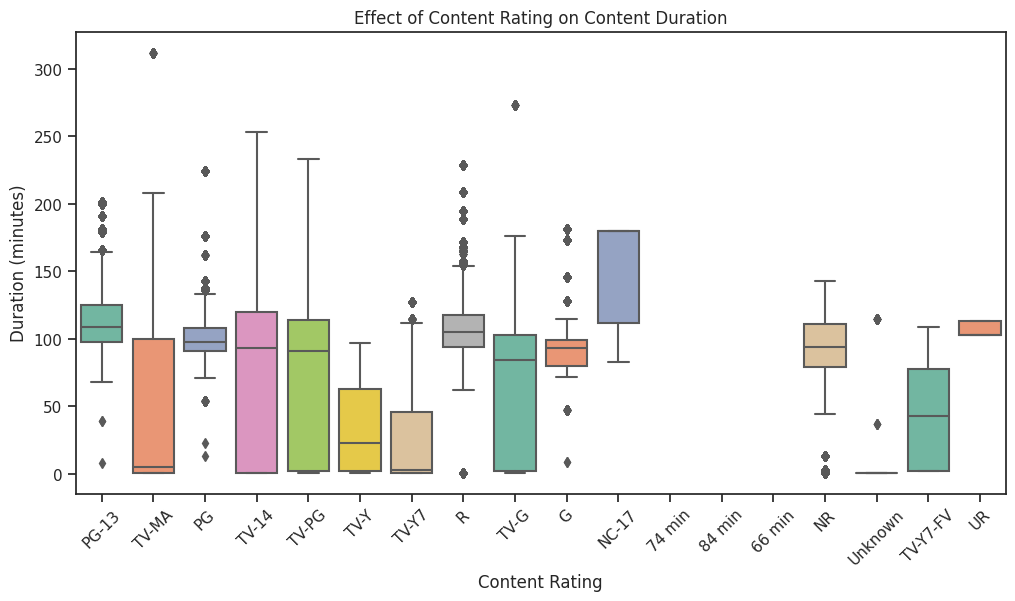

In [121]:
# Creating boxplots to compare content duration by rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_unpacked, x='rating', y='duration', palette='Set2')
plt.title('Effect of Content Rating on Content Duration')
plt.xlabel('Content Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)  #
plt.show()

10.What is the distribution of content duration (e.g., movie length or TV show season count)?

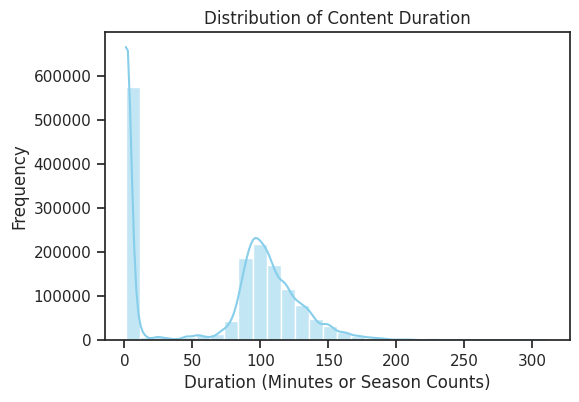

In [164]:
# Converting duration to numeric (e.g., minutes for movies and season counts for TV shows)
# df_unpacked['duration'] = df_unpacked['duration'].str.extract('(\d+)').astype(float)

# Creating a histogram to visualize the distribution of content duration
plt.figure(figsize=(6, 4))
sns.histplot(data=df_unpacked, x='duration', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Content Duration')
plt.xlabel('Duration (Minutes or Season Counts)')
plt.ylabel('Frequency')
plt.show()


11.How does the duration vary between TV shows and movies?

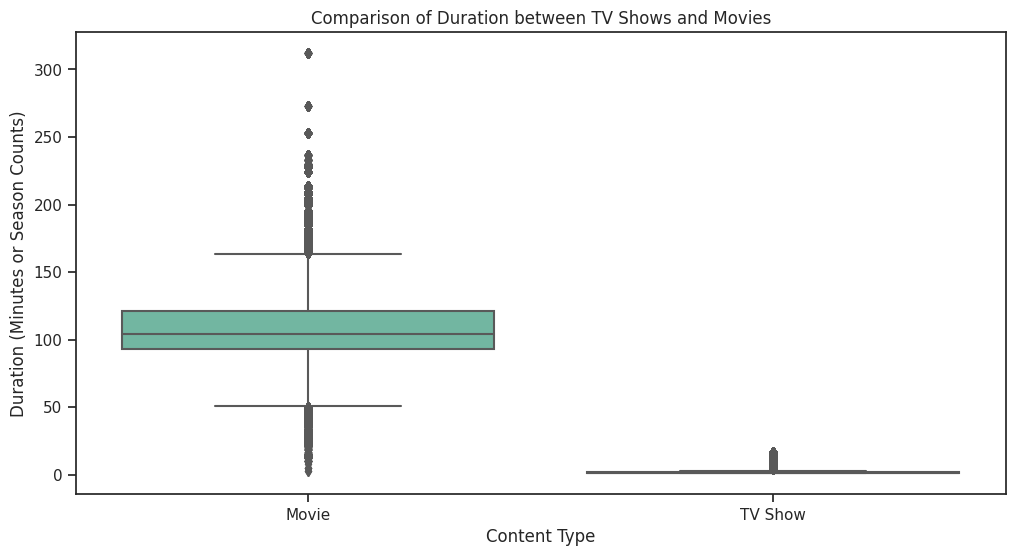

In [124]:
# Creating boxplots to compare content duration between TV shows and movies
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_unpacked, x='type', y='duration', palette='Set2')
plt.title('Comparison of Duration between TV Shows and Movies')
plt.xlabel('Content Type')
plt.ylabel('Duration (Minutes or Season Counts)')
plt.show()


12.What are the most common genres for TV shows and movies?

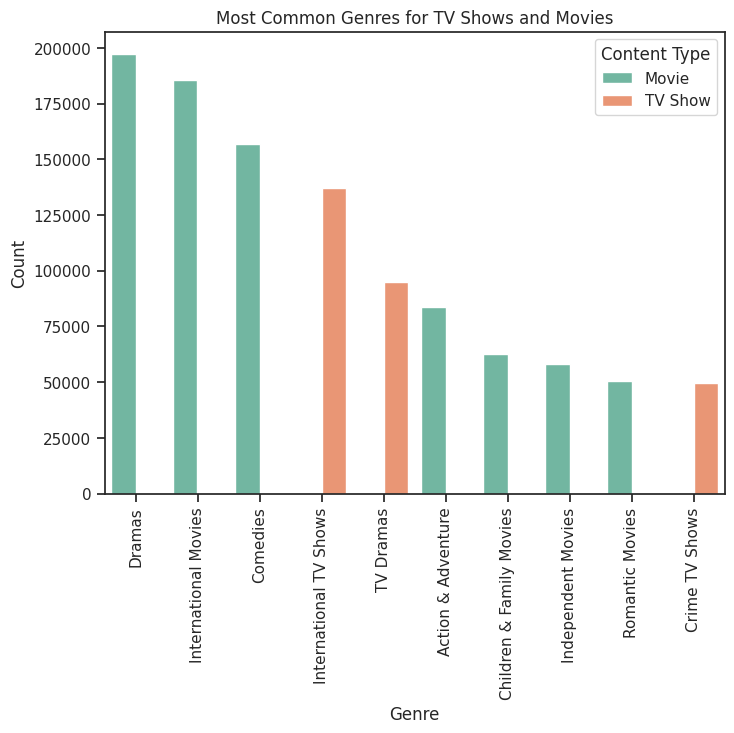

In [153]:
# Creating countplots to visualize the most common genres for TV shows and movies
plt.figure(figsize=(8, 6))
sns.countplot(data=df_unpacked, x='listed_in', hue='type', order=df_unpacked['listed_in'].value_counts().index[:10], palette='Set2')
plt.title('Most Common Genres for TV Shows and Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Content Type', loc='upper right', labels=['Movie', 'TV Show'])
plt.show()

13.How does genre influence content type?

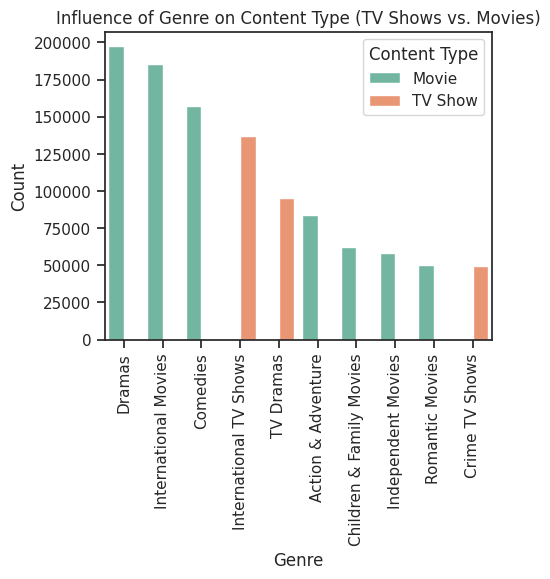

In [163]:
# Creating a countplot to analyze the influence of genre on content type
plt.figure(figsize=(5, 4))
sns.countplot(data=df_unpacked, x='listed_in', hue='type', order=df_unpacked['listed_in'].value_counts().index[:10], palette='Set2')
plt.title('Influence of Genre on Content Type (TV Shows vs. Movies)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Content Type', loc='upper right', labels=['Movie', 'TV Show'])
plt.show()

14.Who are the most frequently appearing directors and cast members?

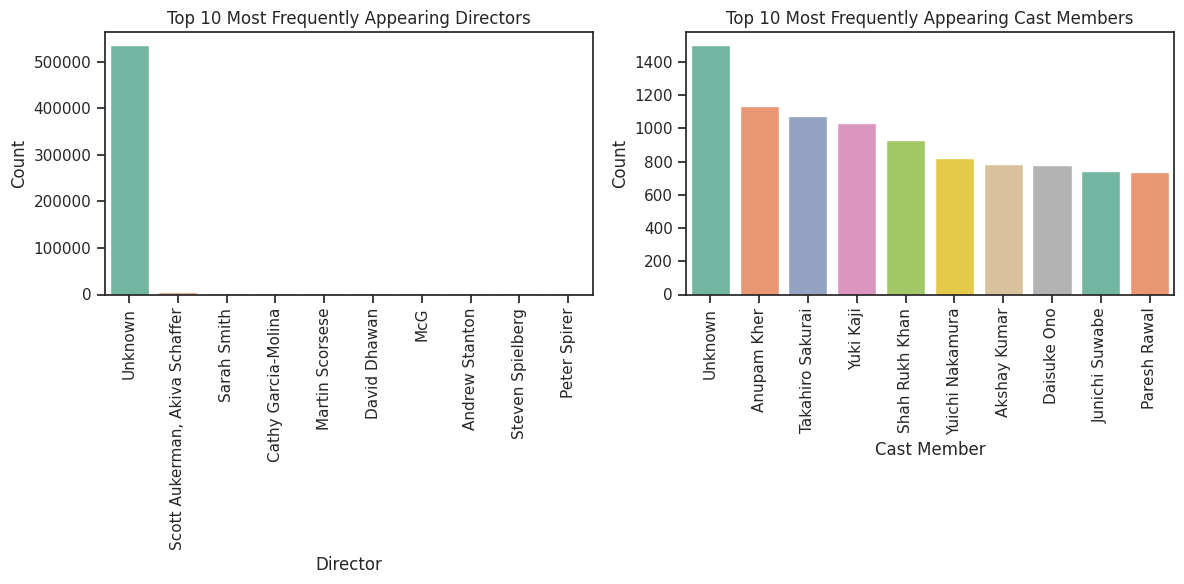

In [133]:
# Creating countplots to visualize the most frequently appearing directors and cast members
plt.figure(figsize=(12, 6))

# Top 10 most frequently appearing directors
plt.subplot(1, 2, 1)
sns.countplot(data=df_unpacked, x='director', order=df_unpacked['director'].value_counts().index[:10], palette='Set2')
plt.title('Top 10 Most Frequently Appearing Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Top 10 most frequently appearing cast members
plt.subplot(1, 2, 2)
sns.countplot(data=df_unpacked, x='cast', order=df_unpacked['cast'].value_counts().index[:10], palette='Set2')
plt.title('Top 10 Most Frequently Appearing Cast Members')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

15.Are there any patterns or preferences in content selection?

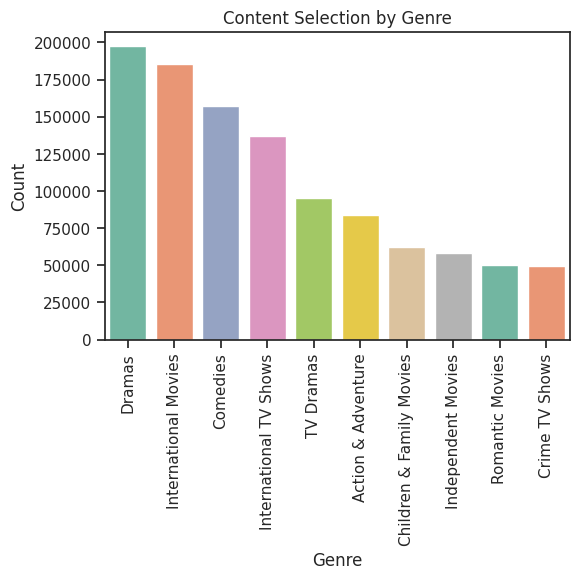

In [160]:
# Content selection by genre
plt.figure(figsize=(6, 4))
sns.countplot(data=df_unpacked, x='listed_in', order=df_unpacked['listed_in'].value_counts().index[:10], palette='Set2')
plt.title('Content Selection by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'R'),
  Text(3, 0, 'TV-PG'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'PG'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'TV-Y'),
  Text(9, 0, 'NR'),
  Text(10, 0, 'G'),
  Text(11, 0, 'Unknown'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'UR'),
  Text(14, 0, 'TV-Y7-FV'),
  Text(15, 0, '74 min'),
  Text(16, 0, '84 min'),
  Text(17, 0, '66 min')])

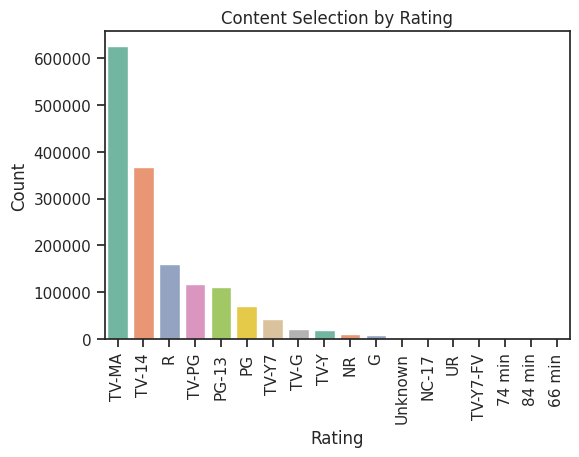

In [161]:
# Content selection by rating
plt.figure(figsize=(6, 4))
sns.countplot(data=df_unpacked, x='rating', order=df_unpacked['rating'].value_counts().index, palette='Set2')
plt.title('Content Selection by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

16.Are there any country-specific trends in content production and distribution?

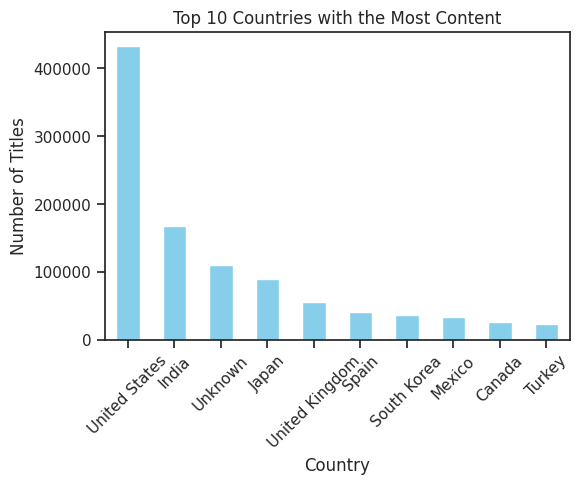

In [162]:
# Grouping the data by country and count the number of titles in each country
country_counts = df_unpacked['country'].value_counts()

# Top 10 countries with the most content
top_countries = country_counts.head(10)

# Creating a bar plot to visualize the distribution of content by country
plt.figure(figsize=(6, 4))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

17.show the correlations of the release_year column with itself and provide some insights into how it relates to other numerical columns if present in dataset.

<ipython-input-150-d2aef4c25c0e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_unpacked.corr()


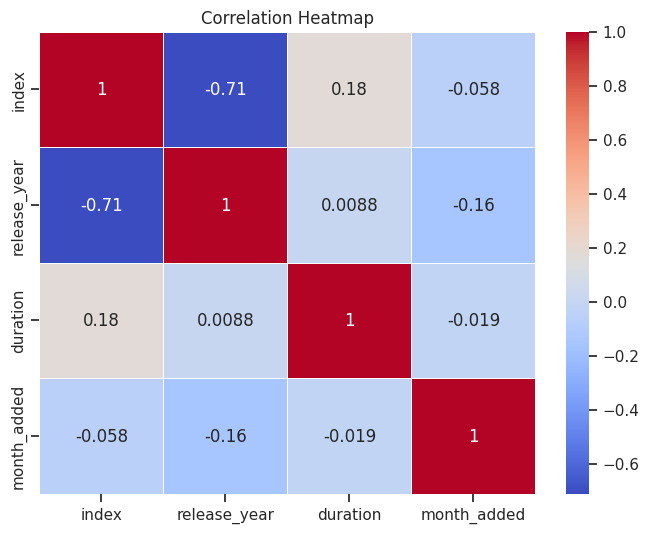

In [150]:
# Calculating the correlation matrix
correlation_matrix = df_unpacked.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

## Recommendations

Certainly! Based on the dataset and the information i've gathered,Here are some possible recommendations:

1. **Diversify Content**: Netflix can consider diversifying its content by producing more titles in popular genres and categories, such as international TV shows, documentaries, or specific genres that have a high viewership.

2. **Focus on Top Countries**: Since certain countries have a higher number of titles, Netflix can focus on producing or acquiring content that caters to the preferences of audiences in these countries.

3. **Content Duration**: Analyzing the duration of content (e.g., movie length or TV show season count) can help Netflix tailor its content to cater to different viewer preferences.

4. **Content Rating**: Understanding how content rating affects viewership can help Netflix create content that resonates with its target audience.

5. **Seasonal Trends**: Analyzing release dates and viewership patterns can help Netflix plan the release of content to maximize viewership during specific seasons or holidays.

6. **Content Analysis**: Identifying keywords and themes in content descriptions can help Netflix produce or promote content that aligns with current trends and audience interests.

7. **Actors and Directors**: Analyzing the popularity of actors and directors can help Netflix in casting decisions and collaborations with filmmakers.

8. **Balance TV Shows and Movies**: If the analysis shows a preference for TV shows over movies (or vice versa), Netflix can adjust its content strategy to cater to the demand.

9. **Global Expansion**: If the dataset shows a growing interest in content from specific countries, Netflix can consider expanding its global reach to tap into emerging markets.

10. **User Feedback**: Incorporate user feedback and recommendations to continuously improve the content selection and user experience.

These are general recommendations that can be tailored to Netflix's specific goals and strategies based on the insights derived from the dataset and analysis.